<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Final%20Asgn_Q2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

(a) [C, R] Some of the attributes in the data set are text data. Use a suitable procedure to convert them into suitable numerical representations in the training data and test data. Explain the procedure you used for the conversion.

In [27]:
spam_classification_train_data = pd.read_excel('Q2_classification_train.xlsx', index_col = False)
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [28]:
spam_classification_train_data['winner'] =spam_classification_train_data['winner'].astype('category').cat.codes
spam_classification_train_data['number'] =spam_classification_train_data['number'].astype('category').cat.codes
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1


In [29]:
spam_classification_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [30]:
spam_classification_test_data = pd.read_excel('Q2_classification_test.xlsx', index_col = False)
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [31]:
spam_classification_test_data['winner'] =spam_classification_test_data['winner'].astype('category').cat.codes
spam_classification_test_data['number'] =spam_classification_test_data['number'].astype('category').cat.codes
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1


In [32]:
spam_classification_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


Checking class balance of training data

In [33]:
# Checking class balance of training data
train_spam_class_0 = spam_classification_train_data[spam_classification_train_data['spam'] == 0]
train_spam_class_1 = spam_classification_train_data[spam_classification_data['spam'] == 1]
print('Train spam_class 0:', train_spam_class_0.shape)
print('Train spam_class 1:', train_spam_class_1.shape)
print('Training data shows class imbalance')

Train spam_class 0: (2842, 20)
Train spam_class 1: (294, 20)
Training data shows class imbalance


In [34]:
# Checking class balance of test data
test_spam_class_0 = spam_classification_test_data[spam_classification_test_data['spam'] == 0]
test_spam_class_1 = spam_classification_test_data[spam_classification_test_data['spam'] == 1]
print('Test spam class 0:', test_spam_class_0.shape)
print('Test spam class 1:', test_spam_class_1.shape)
print('Test data shows class imbalance')

Test spam class 0: (712, 20)
Test spam class 1: (73, 20)
Test data shows class imbalance


In [37]:
n_train = len(spam_classification_train_data.index)
print('number of datapoints in train dataset:', n_train)

n_test = len(spam_classification_test_data.index)
print('number of datapoints in test dataset:', n_test)

number of datapoints in train dataset: 3136
number of datapoints in test dataset: 785


In [39]:
np.random.seed(1000) #for reproducibility
#Create an index array 
indexarr_train = np.arange(n_train) #index array
np.random.shuffle(indexarr_train) #shuffle the indices 
print('shuffled indices of training samples:')
print(indexarr_train)
print('\n')

indexarr_test = np.arange(n_test) #index array
np.random.shuffle(indexarr_test) #shuffle the indices 
print('shuffled indices of test samples:')
print(indexarr_test)

shuffled indices of training samples:
[ 294 1375 1676 ... 2119  599 1459]


shuffled indices of test samples:
[170 227 545 477 723 596 564 154 453 213 708 679 133 199 664 165 377 508
 100 487 177 264 539  15 604 531 256 407 699 190 327 313 180 614 563 760
 374 220 289 709 362 379 397 205 705 575 646 446 483 438 120 571 273 353
 243 621 370 187 612 779  16 448  29 107 777 382 478 134 592 443 229 482
 464 175 573 648  85 326 371 609  98 653 552   5 601 210 565 288  68  31
 318 163 343 330 186 559 426 429 116 388  59 781 295 361 756 641 776 689
 589 465 307 329 490 537 620 149  57 576 497 735 339 383 271 112 189 276
 399 216 762 441 613 272 595  54 234 333 368 431 661 700  58 129 540 122
 450  64 695  71 639 716 108 586 597  17 542 447 585 281 704 682 493 703
 405  50 349 425 650 737 767 178 520 201 248 616 624 628 677 355 561 452
 736 285 654 150 298 619 357 230 517 662 287 166 784 124 512 749 350 158
 687 109  60 686 225 204 212 194 202 351  30  81 530 125 643  95 378 413
 385 138 605  

In [ ]:
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14 ,15, 16, 17, 18, 19]
response_cols = [0]

In [40]:
train_X_data = spam_classification_train_data[spam_classification_train_data.columns[cols]]
train_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [44]:
train_X_array = train_X_data.to_numpy()
train_X_array

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0., 48.,  2.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  2.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  2.]])

In [45]:
train_y = spam_classification_train_data[spam_classification_train_data.columns[response_cols]].to_numpy()
train_y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [43]:
train_X = train_X_array[indexarr_train[0:n_train]]
train_y = train_y[indexarr_train[0:n_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(3136, 19)
shape of train data labels
(3136, 1)


In [46]:
test_X_data = spam_classification_test_data[spam_classification_test_data.columns[cols]]
test_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [47]:
test_X_array = test_X_data.to_numpy()
test_X_array

array([[ 0.,  1.,  0., ...,  0.,  8.,  2.],
       [ 0.,  1.,  0., ...,  0.,  4.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  1.,  0., ...,  0., 27.,  2.],
       [ 0.,  1.,  0., ...,  0.,  3.,  2.],
       [ 1.,  1.,  0., ...,  0.,  2.,  0.]])

In [48]:
test_y = spam_classification_test_data[spam_classification_test_data.columns[response_cols]].to_numpy()
test_y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [49]:
test_X = test_X_array[indexarr_test[0:n_test]]
test_y = test_y[indexarr_test[0:n_test]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(785, 19)
shape of test data labels
(785, 1)


(b) [C] For each of the following classication methods build a classication model using the training data:

i. Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(train_X, train_y.ravel()) #fit the model using the training data

GaussianNB()

In [52]:
predicted_train_y = nb_model.predict(train_X)
predicted_test_y = nb_model.predict(test_X)

In [53]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.91      0.06      0.11      2842
           1       0.09      0.95      0.17       294

    accuracy                           0.14      3136
   macro avg       0.50      0.50      0.14      3136
weighted avg       0.83      0.14      0.11      3136

Test Report:
              precision    recall  f1-score   support

           0       0.84      0.06      0.12       712
           1       0.09      0.88      0.16        73

    accuracy                           0.14       785
   macro avg       0.46      0.47      0.14       785
weighted avg       0.77      0.14      0.12       785



In [54]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[ 164 2678]
 [  16  278]]
Confusion matrix test set:
[[ 46 666]
 [  9  64]]


Text(0.5, 0.98, 'Confusion Matrix')

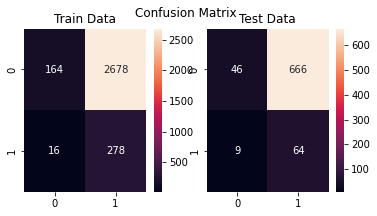

In [56]:
import seaborn as sns
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

ii. Logistics Regression

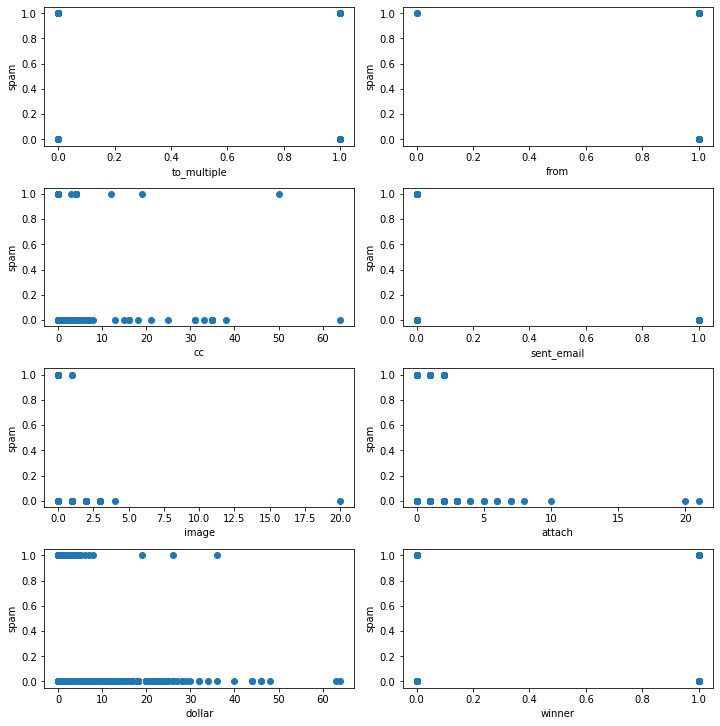

In [63]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['to_multiple'], spam_classification_train_data['spam'])
ax11.set_xlabel('to_multiple')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['from'], spam_classification_train_data['spam'])
ax12.set_xlabel('from')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['cc'], spam_classification_train_data['spam'])
ax21.set_xlabel('cc')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['sent_email'], spam_classification_train_data['spam'])
ax22.set_xlabel('sent_email')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['image'], spam_classification_train_data['spam'])
ax31.set_xlabel('image')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['attach'], spam_classification_train_data['spam'])
ax32.set_xlabel('attach')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['dollar'], spam_classification_train_data['spam'])
ax41.set_xlabel('dollar')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['winner'], spam_classification_train_data['spam'])
ax42.set_xlabel('winner')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


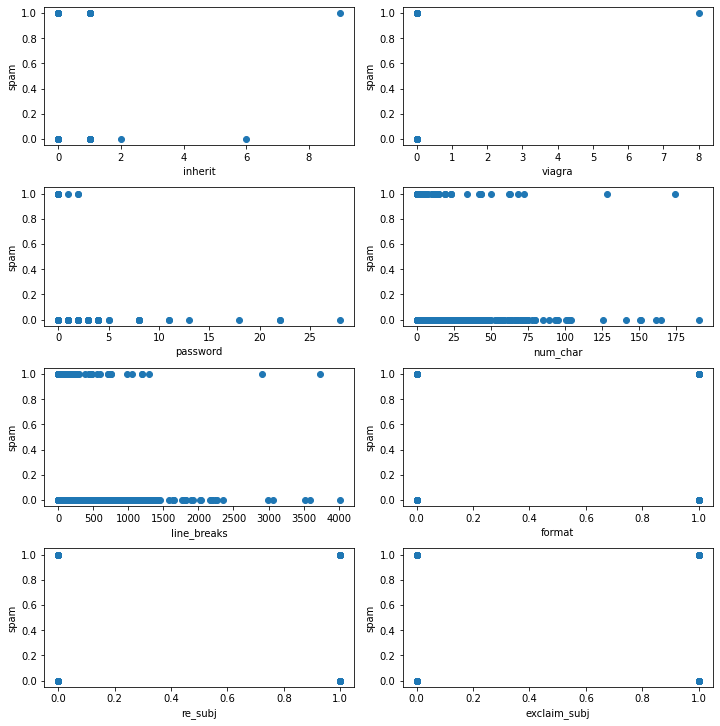

In [64]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['inherit'], spam_classification_train_data['spam'])
ax11.set_xlabel('inherit')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['viagra'], spam_classification_train_data['spam'])
ax12.set_xlabel('viagra')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['password'], spam_classification_train_data['spam'])
ax21.set_xlabel('password')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['num_char'], spam_classification_train_data['spam'])
ax22.set_xlabel('num_char')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['line_breaks'], spam_classification_train_data['spam'])
ax31.set_xlabel('line_breaks')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['format'], spam_classification_train_data['spam'])
ax32.set_xlabel('format')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['re_subj'], spam_classification_train_data['spam'])
ax41.set_xlabel('re_subj')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['exclaim_subj'], spam_classification_train_data['spam'])
ax42.set_xlabel('exclaim_subj')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

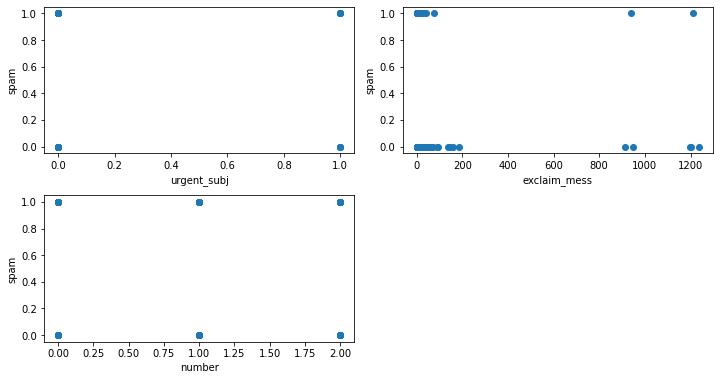

In [65]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)

ax11.scatter(spam_classification_train_data['urgent_subj'], spam_classification_train_data['spam'])
ax11.set_xlabel('urgent_subj')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['exclaim_mess'], spam_classification_train_data['spam'])
ax12.set_xlabel('exclaim_mess')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['number'], spam_classification_train_data['spam'])
ax21.set_xlabel('number')
ax21.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class
logit = LogisticRegression(C=1e6, max_iter=1000) # C is set to be large number in order to remove the inbuilt regularization 
# fitting the training data
logit.fit(train_X,train_y.ravel())

LogisticRegression(C=1000000.0, max_iter=1000)

In [68]:
print(logit.intercept_)
print(logit.coef_)

[-1.04725688]
[[-1.80247406e-02 -9.72684292e-01  1.15801242e-02  2.31305858e-01
   2.47974185e-02 -1.66486225e-01 -2.47834237e-04 -9.39102536e-02
   4.66554226e-02 -7.54243768e-02  2.14337032e-02  1.71306944e-02
  -6.61782624e-04 -8.51621159e-02 -3.30514617e-01 -2.41813554e-01
  -9.67837164e-02 -1.11733643e-03 -1.08449803e-01]]


In [75]:
predicted_train_y = logit.predict(train_X)
predicted_test_y = logit.predict(test_X)

In [69]:
print('Train Accuracy:', logit.score(train_X,train_y.ravel())) #Average accuracy on training data

Train Accuracy: 0.90625


In [71]:
from sklearn.metrics import accuracy_score
test_y_predicted = logit.predict(test_X)
print('Test Accuracy:', accuracy_score(test_y, test_y_predicted)) #Average accuracy on test data
sum(test_y_predicted)

Test Accuracy: 0.9070063694267516


0

In [77]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2842
           1       0.00      0.00      0.00       294

    accuracy                           0.91      3136
   macro avg       0.45      0.50      0.48      3136
weighted avg       0.82      0.91      0.86      3136

Test Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [72]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

[[712   0]
 [ 73   0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

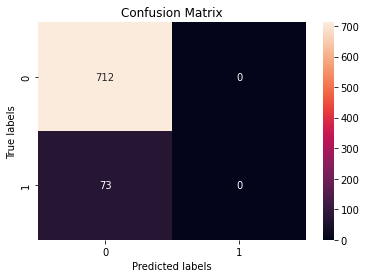

In [74]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

iii. Soft-Margin SVM

In [84]:
from sklearn import svm
from sklearn.svm import LinearSVC #linear svm from scikit learn 

clf = LinearSVC(random_state=0, tol=1e-3, max_iter=100000)
clf_model = clf.fit(train_X,train_y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [85]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [86]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2842
           1       0.00      0.00      0.00       294

    accuracy                           0.91      3136
   macro avg       0.45      0.50      0.48      3136
weighted avg       0.82      0.91      0.86      3136

Test Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [88]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2842    0]
 [ 294    0]]
Confusion matrix test set:
[[712   0]
 [ 73   0]]


Text(0.5, 0.98, 'Confusion Matrix')

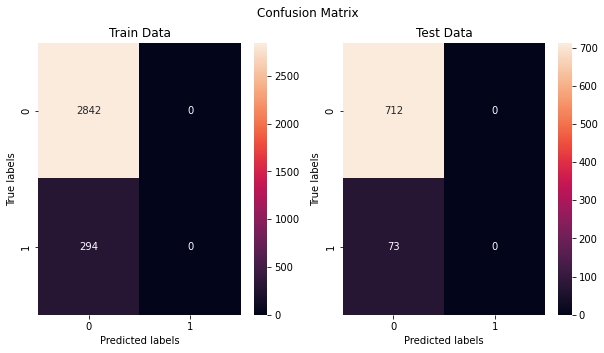

In [91]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')